# Nastya Chatbot Implementation

This is the final chatbot using elasticsearch

Using TF-IDF implementation:

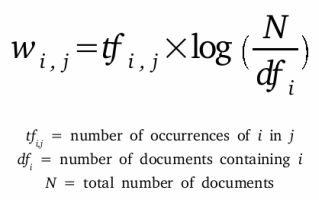

References: 
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- https://towardsdatascience.com/how-to-build-an-easy-quick-and-essentially-useless-chatbot-using-your-own-text-messages-f2cb8b84c11d


__UPDATE__ We're in chatbot V2.0! Lots more data and much better quality at that.

In [1]:
import pandas as pd
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk

Read training dataset

In [2]:
train_data = pd.read_csv('data/train_data_2.csv')
print(train_data.columns)

# drop NaN values
train_data.dropna(subset = ['text','response'], inplace=True)

train_data.head()

Index(['text', 'response'], dtype='object')


,text,response
0,) ) ?)))) -,""" "" , "" "" ,"
1,"!!!!! , )) ?? ?)))",", )))) ) ? ?"
2,.. .. .... . ... ))) ....,", - ) , ....... , !!!! , , -:) ,..."
3,... ... ... )) .... ??,", ))) , . Have you recieved the official..."
5,,", ?"


In [4]:
es = Elasticsearch(['localhost:9200'])

texts_dict = train_data.to_dict(orient='records')

bulk(es, texts_dict, index='textbot', doc_type='clue', raise_on_error=True)

(68197, [])

Running the chatbot

In [7]:
from random import randint
# Randomness indictator for the chatbot
randomness = 10

def chatbot():
    run=True
    while run:
        text = str(input('Me: '))
        ##an optional quit command
        if text == 'quit':
            run=False
        else:
            response = es.search(index='textbot', doc_type='clue', body={ "query": {
                "match": {
                    "text":text
                }
            }})
            try:
                ##introduce a bit of randomness into the response 
                i = randint(0,randomness)
                print("Nastya: %s" % response['hits']['hits'][i]['_source']['response'])
            except:
                print("Nastya: LOST FOR WORDS")

## Voila!

In [9]:
chatbot()

Me: Hey girlll
Nastya: Stop ignoring me. Im cute
Me: Who is better: me or you?
Nastya: Sure
Me: Polite and diplomatic
Nastya: No
Me: Recommend me a book
Nastya: Lol youre just so funny look at you
Me: A movie?
Nastya: Ehhh
Me: A show?
Nastya: Yes. An awesome one
Me: Who are you?
Nastya: Your grandpa. You treat him like Voldemort
Me: Describe yourself
Nastya: I don't like to define myself, other people do it better. But if I have to make a similar statement: I am from Russia, I do air fitness and I live off campus
Me: But you don't anymore
Nastya: Okay then
Me: How do you feel about Pratik?
Nastya: Im tired of caring about that. Contrary to what my grandma thinks it doesnt depend on me. There are some things I cant change
Me: Wise
Nastya: socially, academics just added on top. Plus looking for a job. Sorry for complaining
Me: What job are you looking for?
Nastya: Nope. Chicago. U Chicago
Me: What about it?
Nastya: Waldo finds himself. You only tagged me in one thing
Me: What is your fav